# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Semana 8 - Introdução à Teoria do Aprendizado Estatístico</span>

## Regressão e Regularização

*Moacir Antonelli Ponti*<br>
*ICMC/USP São Carlos*

Num problema de regressão devemos tentar ajustar o modelo aos dados disponíveis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# representa a funcao "verdadeira"
def true_fun(X):
    return np.cos(1.5 * np.pi * X)*2

X = np.linspace(0,1,100)
plt.plot(X, true_fun(X), '-', label="Função real")

In [3]:
true_fun(3)

1.102182119232618e-15

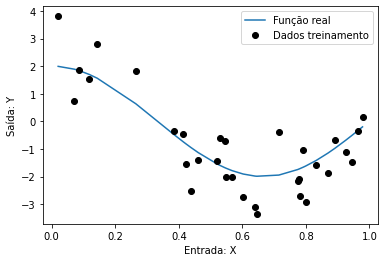

In [4]:
# simulando um cenário real vamos amostrar pontos com ruído
np.random.seed(0)

# amostra da funcao verdadeira X,y
n_samples = 32
# sorteia pontos em X
X = np.sort(np.random.rand(n_samples))
# computa funcao e insere ruido
y = true_fun(X) + np.random.randn(n_samples) * 0.8

# exibindo funcao e dados de treinamento
plt.plot(X, true_fun(X), '-', label="Função real")
plt.plot(X, y, 'ok', label="Dados treinamento")
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="best")

Vamos ajustar duas funções regressoras, usando o algoritmo de Regressão Linear

Esse algoritmo tenta aproximar uma função que **minimize o erro médio quadrático**:

$$||y - f(x)||^2$$



### Regressão Linear usando os dados originais

#### viés linear

$f(x) = wx + b$

aprender significa ajustar $w$ e $b$ o melhor possível aos dados disponíveis



In [6]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.26455561, 0.38344152, 0.41466194, 0.4236548 , 0.43758721,
       0.46147936, 0.52184832, 0.52889492, 0.54488318, 0.5488135 ,
       0.56804456, 0.60276338, 0.63992102, 0.64589411, 0.71518937,
       0.77423369, 0.77815675, 0.78052918, 0.79172504, 0.79915856,
       0.83261985, 0.87001215, 0.891773  , 0.92559664, 0.94466892,
       0.96366276, 0.97861834])

In [7]:
y

array([ 3.80673287,  0.72549271,  1.87038005,  1.54756708,  2.78696659,
        1.81241254, -0.34392418, -0.44534708, -1.53601769, -2.52815546,
       -1.41400077, -1.42699266, -0.60886166, -0.71768576, -2.00927234,
       -2.02971332, -2.74884201, -3.12015032, -3.35544167, -0.38732269,
       -2.15623135, -2.08072162, -2.72117621, -1.04064124, -2.91380087,
       -1.5891527 , -1.86629008, -0.66684597, -1.09559987, -1.46010003,
       -0.36334502,  0.14148892])

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X.reshape(-1, 1), y)

LinearRegression()

In [12]:
print("Predicoes")
print(linear_regression.predict(X[:, np.newaxis]))
print("Dados anotados (reais) de treinamento")
print(y)

Predicoes
[ 1.31097135  1.11173742  1.04864283  0.92653635  0.82821305  0.35303149
 -0.1130684  -0.23547008 -0.27072717 -0.32535009 -0.41902081 -0.65570123
 -0.68332787 -0.74601089 -0.76141997 -0.83681657 -0.97293393 -1.11861288
 -1.14203078 -1.4137073  -1.64519439 -1.66057501 -1.66987625 -1.71377036
 -1.74291398 -1.87410109 -2.02070004 -2.10601487 -2.23862263 -2.31339673
 -2.38786332 -2.44649765]
Dados anotados (reais) de treinamento
[ 3.80673287  0.72549271  1.87038005  1.54756708  2.78696659  1.81241254
 -0.34392418 -0.44534708 -1.53601769 -2.52815546 -1.41400077 -1.42699266
 -0.60886166 -0.71768576 -2.00927234 -2.02971332 -2.74884201 -3.12015032
 -3.35544167 -0.38732269 -2.15623135 -2.08072162 -2.72117621 -1.04064124
 -2.91380087 -1.5891527  -1.86629008 -0.66684597 -1.09559987 -1.46010003
 -0.36334502  0.14148892]


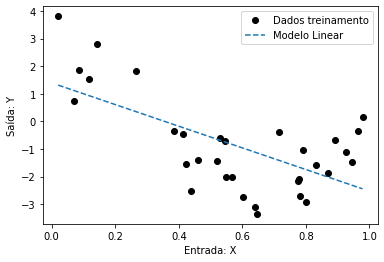

In [13]:
plt.plot(X, y, 'ok', label="Dados treinamento")
plt.plot(X, linear_regression.predict(X[:, np.newaxis]), '--', label="Modelo Linear")
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="best")

### Regressão usando features polinomiais

#### viés polinomial de grau k

$f(x) = w_k x^k + \ldots w_2 x^2 + w_1 x^1 + w_0$

aprender significa ajustar $w_0$ ate $w_k$ o melhor possível aos dados disponíveis
* aqui trocamos $b$ por $w_0$


`PolynomialFeatures(degree=5)`

x -> [x^5, x^4, x^3, x^2, x^1]

In [20]:
# grau do polinômio
k = 27

# criamos um objeto para gerar características polinomiais
polynomial_featuresK = PolynomialFeatures(degree=k, include_bias=False)
linear_regressionK = LinearRegression()

# incluímos em um "pipeline" para o regressor receber as features
pipelineK = Pipeline([("polynomial_features", polynomial_featuresK),
                         ("linear_regression", linear_regressionK)])

# np.newaxis expande o array para permitir features
pipelineK.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=27, include_bias=False)),
                ('linear_regression', LinearRegression())])

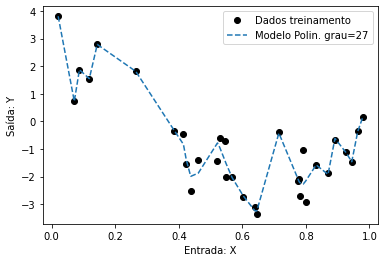

In [22]:
plt.plot(X, y, 'ok', label="Dados treinamento")
plt.plot(X, pipelineK.predict(X[:, np.newaxis]), '--', label="Modelo Polin. grau=%d"%(k))
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="best")

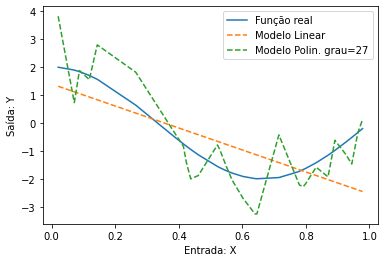

In [23]:
plt.plot(X, true_fun(X), '-', label="Função real")
plt.plot(X, linear_regression.predict(X[:, np.newaxis]), '--', label="Modelo Linear")
plt.plot(X, pipelineK.predict(X[:, np.newaxis]), '--', label="Modelo Polin. grau=%d"%(k))
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="best")

### Regularização como forma de reduzir variância

A regularização altera a função objetivo. Ao invés de


$$||y - f(x)||^2$$

Inserimos um novo termo:

$$||y - f(x)||^2 + \alpha ||W||^2$$

em que:
* $W$ representa os *parâmetros* a serem ajustados
* $\alpha$ controla o peso da regularização

chamamos o uso da norma quadrada de regularização L2.

Queremos que o modelo minimize os quadrados dos parâmetros: **o que isso significa?**

---
No `sklearn` o método que utiliza a regularização é chamado *Ridge regression*

In [24]:
from sklearn.linear_model import Ridge

# vamos usar features polinomiais, mas a regressão será regularizada
polynomial_featuresK = PolynomialFeatures(degree=k, include_bias=False)

ridge_regression = Ridge(alpha=1.0)

In [26]:
pipeline_reg = Pipeline([("polynomial_features", polynomial_featuresK),
                         ("ridge_regression", ridge_regression)])
pipeline_reg.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=27, include_bias=False)),
                ('ridge_regression', Ridge())])

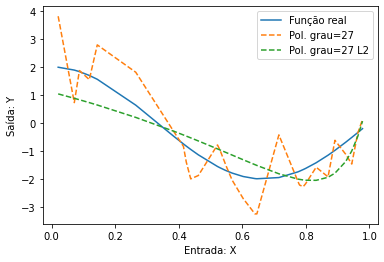

In [27]:
plt.plot(X, true_fun(X), '-', label="Função real")
plt.plot(X, pipelineK.predict(X[:, np.newaxis]), '--', label="Pol. grau=%d"%(k))
plt.plot(X, pipeline_reg.predict(X[:, np.newaxis]), '--', label="Pol. grau=%d L2"%(k))
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="best")

**O alpha controla a regularização**

Vamos testar vários valores

In [28]:
# lista de valores a serem testados
alpha_values = [0.00, 0.01, 0.1, 0.5, 1.0]

# lista de modelos
ridge_models = []

for i,alpha in zip(range(len(alpha_values)), alpha_values):
    polynomial_featuresK = PolynomialFeatures(degree=k, include_bias=False)
    ridge_regressionK = Ridge(alpha=alpha)
    pipelinerK = Pipeline([("polynomial_features", polynomial_featuresK),
                             ("linear_regression", ridge_regressionK)])
    pipelinerK.fit(X[:, np.newaxis], y)
    ridge_models.append(pipelinerK)

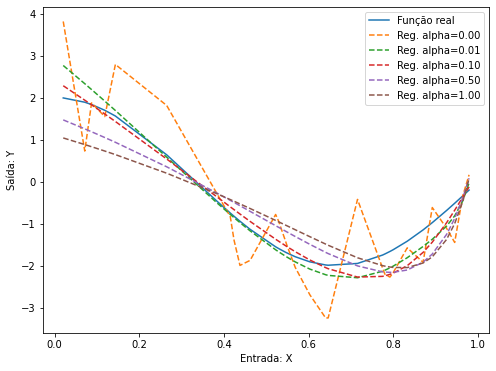

In [29]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, true_fun(X), label="Função real")
for i,alpha in zip(range(len(alpha_values)), alpha_values):
    plt.plot(X, ridge_models[i].predict(X[:, np.newaxis]), '--', label="Reg. alpha=%.2f"%(alpha))
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="upper right")

Pela análise, uma regularização com peso pequeno parece ser suficiente!

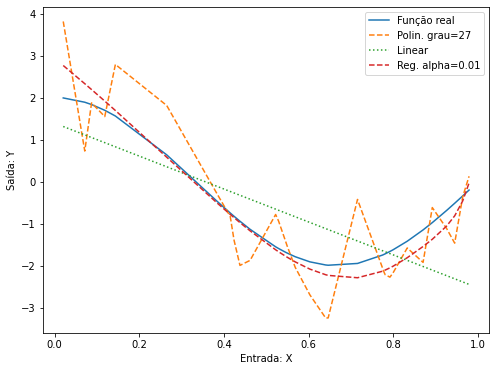

In [30]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, true_fun(X), label="Função real")
plt.plot(X, pipelineK.predict(X[:, np.newaxis]), '--', label="Polin. grau=%d"%(k))
plt.plot(X, linear_regression.predict(X[:, np.newaxis]), ':', label="Linear")
plt.plot(X, ridge_models[1].predict(X[:, np.newaxis]), '--', label="Reg. alpha=%.2f"%(0.01))
plt.xlabel("Entrada: X")
plt.ylabel("Saída: Y")
plt.legend(loc="upper right")